# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [2]:

bookReviewDataset_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataset_filename)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [3]:
df['Review'][2]

"The four tales in this collection are beautifully composed; they are art, not just stories.  Each story is deep in its unique complexities.  Each one has plots and subplots and paints an impeccable image of the story upon the reader's mind.  And when I look back upon the book as a whole, upon the adventurous stories, the excitement and emotion that the author presents so exquisitely, I can't help but be extremely impressed.\n"

In [4]:
df.shape

(1973, 2)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
#EDA
df['Positive Review'].value_counts()  #balanced reviews

False    993
True     980
Name: Positive Review, dtype: int64

In [6]:
# Detect missingness
print(df.isnull().values.any()) # no missing values
print(df.isna().values.any())

False
False


In [7]:
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

In [11]:
# baseline model

y = df['Positive Review'] # label
X = df['Review'] # feature
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1234)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)
print(X)

(1381,)
(592,)
(1973,)
0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object


In [13]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

### Text tranformation
In the following code cell, transform the feature into numerical vectors using TfidfVectorizer.```vocabulary_size``` is the dimension of each of the training examples, which we will need for ```input_shape``` when constructing neural network

In [15]:
# implement tfidf vectorizer to transform text
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

17799


## Construct a neural network
Create a neural network with an inner layer, three hidden layers, and an output layer. 

In [34]:
# Construct neural network
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))# YOUR CODE HERE

nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units = 64, activation = 'relu')# YOUR CODE HERE

nn_model.add(hidden_layer_1)

nn_model.add(keras.layers.Dropout(.25))

hidden_layer_2 = keras.layers.Dense(units = 32, activation = 'relu')# YOUR CODE HERE

nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units = 16, activation = 'relu') # YOUR CODE HERE

nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units = 1, activation = 'sigmoid') # YOUR CODE HERE

nn_model.add(output_layer)

nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1139200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,141,825
Trainable params: 1,141,825
Non-trainable params: 0
_________________________________________________________________


In [35]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics =['accuracy'])

In [36]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))



In [37]:
t0 = time.time() # start time

# num_epochs = 100 #epochs
num_epochs = 50

history = nn_model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
    validation_split=0.2,
)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6867, Accuracy: 0.5453, Val_loss: 0.6876, Val_accuracy: 0.5560
Epoch [10/ 50], Loss: 0.6328, Accuracy: 0.7283, Val_loss: 0.6481, Val_accuracy: 0.7545
Epoch [15/ 50], Loss: 0.5298, Accuracy: 0.7418, Val_loss: 0.5243, Val_accuracy: 0.7762
Epoch [20/ 50], Loss: 0.4039, Accuracy: 0.8143, Val_loss: 0.5886, Val_accuracy: 0.6787
Epoch [25/ 50], Loss: 0.2917, Accuracy: 0.8850, Val_loss: 0.6720, Val_accuracy: 0.6859
Epoch [30/ 50], Loss: 0.5939, Accuracy: 0.7572, Val_loss: 0.5173, Val_accuracy: 0.7401
Epoch [35/ 50], Loss: 0.0254, Accuracy: 1.0000, Val_loss: 0.4418, Val_accuracy: 0.8195
Epoch [40/ 50], Loss: 0.0096, Accuracy: 1.0000, Val_loss: 0.7409, Val_accuracy: 0.7437
Epoch [45/ 50], Loss: 0.0041, Accuracy: 1.0000, Val_loss: 0.5063, Val_accuracy: 0.8159
Epoch [50/ 50], Loss: 0.0034, Accuracy: 1.0000, Val_loss: 0.5362, Val_accuracy: 0.8159
Elapsed time: 15.43s


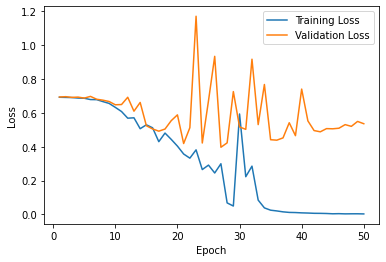

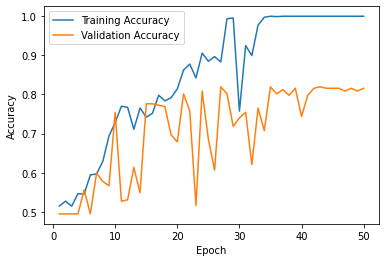

In [38]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Evaluation
Using loss and accuracy on the testing dataset

In [39]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)# YOUR CODE HERE


print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

19/19 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.8108
Loss:  0.5387131571769714 Accuracy:  0.8108108043670654


In [41]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Positive Review"
    else:
        class_pred = "Negative Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.9972216]			Positive Review
[0.8936113]			Positive Review
[0.20627582]			Negative Review
[0.06056044]			Negative Review
[0.9866637]			Positive Review
[0.91274947]			Positive Review
[0.00097063]			Negative Review
[7.373382e-05]			Negative Review
[0.99849117]			Positive Review
[0.99679065]			Positive Review


In [45]:
# check if the model works - if the model properly predicted the review
print('Review #1:\n')
print(X_test.to_numpy()[5])

goodReview = True if probability_predictions[5] >= .5 else False
    
print('\nPrediction: Is this a positive review? {}\n'.format(goodReview))

print('Actual: Is this a positive review? {}\n'.format(y_test.to_numpy()[56]))

Review #1:

I bought this book before my first trip to Austria. I had a 
sinking feeling while reading it that it was mostly a 
pastiche of unusable generalizations. That turned out to be
true. What shall we do with a paragraph that tells us that
Austrian women are strong-minded and independent and 
organize their homelife well, although many go to work?

This book might have some value for a person who had never
left their english-speaking homeland before and needed to 
be warned that people are sometimes naked in the sauna
or at the beach. It also provides some amusing anecdotes
about language (especially viennese) and useful info about 
festivals.

Mostly, though this book was good for reading aloud to
Austrian friends. I would quote it as an iron-clad 
authority when their behavior didn't quite match the 
book's version and thereby amused them tremendously.


--Lynn Hoffman, author of THE NEW SHORT COURSE IN WINE and
the forthcoming novel bang BANG from Kunati Books.ISBN
9781601640

## Analysis and results



The model has a loss of about 54 % and a accuracy of 81%, which means the model has a pretty good performance. Fortunately, there is no missing values in this dataset, from the EDA process. However, it might be a potential issue for training on additional datasets. 